In [24]:
import csv
import json
from rdkit import Chem
from collections import Counter
import matplotlib.pyplot as plt
from rdkit.Chem import Draw

In [2]:
with open ('/home/test/BiDe/sele/all_NH2.json', 'r') as f:
    smiles_dict = json.load(f)
smiles_list = list(smiles_dict.values())
keys_list = list(smiles_dict.keys())

In [3]:
with open ('/home/test/BiDe/sele/N3.csv', 'r') as f:
    N3_list = f.read().splitlines()
with open ('/home/test/BiDe/sele/acytylene.csv', 'r') as f:
    acytylene_list = f.read().splitlines()

In [4]:
def smiles_to_image_grid(smiles_list, img_size=(200, 200), mols_per_row=4, kekulize=True):
    mols = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]
    if kekulize:
        for mol in mols:
            Chem.Kekulize(mol)
    img = Draw.MolsToGridImage(mols, molsPerRow=mols_per_row, subImgSize=img_size)
    return img

In [5]:
def save_list_to_csv(filename, data_list):
    with open(filename, 'w', newline='', encoding='utf-8') as csvfile:
        csv_writer = csv.writer(csvfile)
        for item in data_list:
            csv_writer.writerow([item])

In [6]:
# print(smiles_list[2313],keys_list[2313])

In [7]:
# print(N3_list[923],acytylene_list[530])

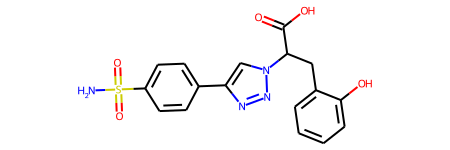

In [8]:
Chem.MolFromSmiles('NS(=O)(=O)c1ccc(C2=CN(C(Cc3ccccc3O)C(=O)O)N=N2)cc1')

In [9]:
receptor_pdb_list=['7ENE','7L0D','7L10','7M04','7M90','7RFS','7RVT','7S6X','6LU7']

In [10]:
docking_results = {}
docking_results_all = []

In [11]:
for i in receptor_pdb_list:
    docking_results[i] = []
    with open (f'./docking_result_for_NH2/{i}_docking_result.txt', 'r') as f:
        docking_results_values = f.read().splitlines()
        docking_results[i] = docking_results_values
        docking_results_all = docking_results_all + docking_results_values

In [12]:
top45_NH2_list = []
top45_acylyene_list = []
for i in docking_results:
    sorted_data = sorted(enumerate(docking_results[i]), key=lambda x: x[1], reverse=True)
    top_ten_indices = [index for index, value in sorted_data[:5]]
    for j in top_ten_indices:
        top45_NH2_list.append(N3_list[int(keys_list[j].split('_')[0])])
        top45_acylyene_list.append(acytylene_list[int(keys_list[j].split('_')[1])])

In [13]:
element_counts_NH2 = Counter(top45_NH2_list)
element_counts_acylyene = Counter(top45_acylyene_list)
print(element_counts_NH2)
print(element_counts_acylyene)
# Counter({'[N-]=[N+]=[N]c1cccc2c1[nH]c1ccccc12': 6, '[N-]=[N+]=[N]c1cccc2c1CN(C1CCC(=O)NC1=O)C2=O': 4, '[N-]=[N+]=[N][C@@H](CO)c1cc2ccccc2c2ccccc12': 3, '[N-]=[N+]=[N]c1nnc(Cc2ccc(F)cc2)o1': 3, '[N-]=[N+]=[N]c1ccc2cc(-c3ccccc3)c(=O)oc2c1': 2, '[N-]=[N+]=[N]CCC(O)c1ccccc1': 2, '[N-]=[N+]=[N]C1CC2(CNC(=O)C2)C1': 2, '[N-]=[N+]=[N]CCC(=O)N1Cc2ccccc2C#Cc2ccccc21': 2, '[N-]=[N+]=[N]c1ccc(S(=O)(=O)NC(=O)c2ccccc2)cc1': 1, '[N-]=[N+]=[N]c1nc2c(N3CCOCC3)cccc2s1': 1, '[N-]=[N+]=[N]CCc1c[nH]c2cc(F)ccc12': 1, '[N-]=[N+]=[N]c1nc2ccc(OC(F)(F)F)cc2s1': 1, '[N-]=[N+]=[N]c1ccc(S(=O)(=O)[N-]c2cnc3ccccc3n2)cc1': 1, '[N-]=[N+]=[N]c1nc2cc(C(F)(F)F)ccn2n1': 1, '[N-]=[N+]=[N]C1CCCc2cc(O)ccc21': 1, '[N-]=[N+]=[N]c1ccc2c(c1)CCC(=O)N2': 1, 'CC(=O)Nc1ccc(Cc2ccc([N]=[N+]=[N-])cc2)cc1': 1, '[N-]=[N+]=[N]c1ccc(N2CCN(C(=O)c3ccccc3F)CC2)cc1': 1, '[N-]=[N+]=[N]c1ccccc1Cl': 1, 'N#Cc1c[nH]c2ccc([N]=[N+]=[N-])cc12': 1, '[N-]=[N+]=[N]c1cccc2c(Cl)cccc12': 1, 'Cc1ccc2[nH]c([N]=[N+]=[N-])nc2c1': 1, '[N-]=[N+]=[N]CCNC(=O)Cc1cccc2ccccc12': 1, '[N-]=[N+]=[N]c1ccc(CCc2ccccc2)cc1': 1, '[N-]=[N+]=[N]c1nc(-c2ccc(C(F)(F)F)cc2)cs1': 1, 'Cc1ccc2nc(-c3ccc([N]=[N+]=[N-])cc3O)oc2c1': 1, '[N-]=[N+]=[N]c1ccc2[nH]c(=O)c(=O)[nH]c2c1': 1, '[N-]=[N+]=[N]c1ccc2c3c(cccc13)C(=O)OC2=O': 1, '[N-]=[N+]=[N]c1c[nH]c2ncnc(Cl)c12': 1})
# Counter({'C#Cc1cccc2c1CN(C1CCC(=O)NC1=O)C2=O': 11, 'C#Cc1ccc2c(c1)C(=O)N(C1CCC(=O)NC1=O)C2=O': 6, 'C#Cc1ccc2ccccc2c1': 5, 'C#Cc1cnc(N)c(-c2ccccc2)n1': 4, 'C#CCON1C(=O)c2ccccc2C1=O': 2, 'C#CCN[C@@H]1CCc2ccccc21': 2, 'C#Cc1ccc(C#Cc2ccccc2)cc1': 2, 'C#Cc1cccc2nccn12': 2, 'C#Cc1ccc(-c2ccc(O)cc2)cc1': 1, 'C#CCn1c2ccccc2c2ccccc21': 1, 'C#Cc1cccc(C(=O)O)c1': 1, 'C#Cc1cnc2[nH]ncc2c1': 1, 'C#Cc1ccc2[nH]nc(C)c2c1': 1, 'C#Cc1cc(F)c(F)cc1F': 1, 'C#Cc1cccc2cn[nH]c12': 1, 'C#CCCNC(=O)c1ccc(N)c(N)c1': 1, 'C#Cc1cccc(=O)[nH]1.O=C(O)C(F)(F)F': 1, 'C#Cc1cccc(C(N)=O)c1': 1, 'C#Cc1ccccc1C(F)(F)F': 1})

Counter({'[N-]=[N+]=[N]c1cccc2c1[nH]c1ccccc12': 6, '[N-]=[N+]=[N]c1cccc2c1CN(C1CCC(=O)NC1=O)C2=O': 4, '[N-]=[N+]=[N][C@@H](CO)c1cc2ccccc2c2ccccc12': 3, '[N-]=[N+]=[N]c1nnc(Cc2ccc(F)cc2)o1': 3, '[N-]=[N+]=[N]c1ccc2cc(-c3ccccc3)c(=O)oc2c1': 2, '[N-]=[N+]=[N]CCC(O)c1ccccc1': 2, '[N-]=[N+]=[N]C1CC2(CNC(=O)C2)C1': 2, '[N-]=[N+]=[N]CCC(=O)N1Cc2ccccc2C#Cc2ccccc21': 2, '[N-]=[N+]=[N]c1ccc(S(=O)(=O)NC(=O)c2ccccc2)cc1': 1, '[N-]=[N+]=[N]c1nc2c(N3CCOCC3)cccc2s1': 1, '[N-]=[N+]=[N]CCc1c[nH]c2cc(F)ccc12': 1, '[N-]=[N+]=[N]c1nc2ccc(OC(F)(F)F)cc2s1': 1, '[N-]=[N+]=[N]c1ccc(S(=O)(=O)[N-]c2cnc3ccccc3n2)cc1': 1, '[N-]=[N+]=[N]c1nc2cc(C(F)(F)F)ccn2n1': 1, '[N-]=[N+]=[N]C1CCCc2cc(O)ccc21': 1, '[N-]=[N+]=[N]c1ccc2c(c1)CCC(=O)N2': 1, 'CC(=O)Nc1ccc(Cc2ccc([N]=[N+]=[N-])cc2)cc1': 1, '[N-]=[N+]=[N]c1ccc(N2CCN(C(=O)c3ccccc3F)CC2)cc1': 1, '[N-]=[N+]=[N]c1ccccc1Cl': 1, 'N#Cc1c[nH]c2ccc([N]=[N+]=[N-])cc12': 1, '[N-]=[N+]=[N]c1cccc2c(Cl)cccc12': 1, 'Cc1ccc2[nH]c([N]=[N+]=[N-])nc2c1': 1, '[N-]=[N+]=[N]CCNC(=O)Cc1ccc

In [14]:
docking_results_NH2 = {}
docking_results_values_NH2 = {}
for i in receptor_pdb_list:
    docking_results_NH2[i] = []
    docking_results_values_NH2[i] = []
    for j in range(0,len(docking_results[i]),3):
        sum = float(docking_results[i][j])+float(docking_results[i][j+1])+float(docking_results[i][j+2])
        docking_results_values_NH2[i].append(sum)
        docking_results_NH2[i].append([N3_list[int(keys_list[j].split('_')[0])],sum])

In [15]:
all_top10_NH2_list = []
for i in docking_results_values_NH2:
    sorted_data_NH2 = sorted(enumerate(docking_results_values_NH2[i]), key=lambda x: x[1], reverse=True)
    top_ten_indices = [index for index, value in sorted_data_NH2[-10:]]
    for j in top_ten_indices:
        all_top10_NH2_list.append(docking_results_NH2[i][j][0])

In [16]:
element_counts_all_top10_NH2 = Counter(all_top10_NH2_list)
print(element_counts_all_top10_NH2)
# Counter({'[N-]=[N+]=[N][C@H](CO)c1ccc2cc3ccccc3cc2c1': 8, '[N-]=[N+]=[N]c1cccc2c1[nH]c1ccccc12': 6, '[N-]=[N+]=[N]C12CCCC(NC(=O)OCc3ccccc3)(CC1)C2': 5, '[N-]=[N+]=[N][C@@H](CO)c1cc2ccccc2c2ccccc12': 5, '[N-]=[N+]=[N]c1ccc2cc(-c3nc4ccccc4[nH]3)c(=O)oc2c1': 5, '[N-]=[N+]=[N]Cc1cccc2c1CN(C1CCC(=O)NC1=O)C2=O': 4, '[N-]=[N+]=[N]c1ccc2c(=O)[nH][nH]c(=O)c2c1': 3, '[N-]=[N+]=[N]c1ccc(N2CCN(C(=O)c3ccccc3F)CC2)cc1': 3, '[N-]=[N+]=[N]c1ccc(CNc2ccccc2)cc1': 2, '[N-]=[N+]=[N]c1cc(-c2ccc(C(F)(F)F)cc2)n[nH]1': 2, '[N-]=[N+]=[N]c1ccc2cc(-c3ccccc3)c(=O)oc2c1': 2, '[N-]=[N+]=[N]c1ccc(S(=O)(=O)[N-]c2cnc3ccccc3n2)cc1': 2, '[N-]=[N+]=[N]c1ccn(Cc2ccc(Cl)c(Cl)c2)n1': 2, '[N-]=[N+]=[N]c1ccc(-n2c(=O)[nH]c3cc(F)c(F)cc3c2=O)cc1': 2, 'Cc1ccc2nc(-c3ccc([N]=[N+]=[N-])cc3O)oc2c1': 2, '[N-]=[N+]=[N]c1ccc(N2CCN(c3ccc(O)cc3)CC2)cc1': 2, '[N-]=[N+]=[N]C1CCN(C(=O)OCc2ccccc2)C1': 1, '[N-]=[N+]=[N]c1ccc(S(=O)(=O)NC(=O)c2ccccc2)cc1': 1, '[N-]=[N+]=[N]c1ccc(S(=O)(=O)NCc2ccccc2)cc1': 1, '[N-]=[N+]=[N]c1n[nH]c2ccc(Cc3cc(F)cc(F)c3)cc12': 1, '[N-]=[N+]=[N][C@H]1CC[C@H](NC2CC2c2ccccc2)CC1': 1, '[N-]=[N+]=[N]c1ccc(O)c(-c2nc3ccccc3s2)c1': 1, '[N-]=[N+]=[N]c1cccc(-c2cccc(C(=O)O)c2)c1O': 1, '[N-]=[N+]=[N]c1cc(-c2cccc(SC(F)(F)F)c2)n[nH]1': 1, '[N-]=[N+]=[N]c1nc(-c2cccc(C(F)(F)F)c2)n[nH]1': 1, '[N-]=[N+]=[N]c1ccccc1C#Cc1ccc(F)cc1': 1, '[N-]=[N+]=[N]c1ccc(S(=O)(=O)N2CCCc3ccccc32)cc1': 1, '[N-]=[N+]=[N]CCC(=O)N1Cc2ccccc2C#Cc2ccccc21': 1, '[N-]=[N+]=[N]c1ccc(C(=O)NC2CN3CCC2CC3)cc1': 1, '[N-]=[N+]=[N]c1ccc(C(=O)Nc2ccccc2Cl)cc1': 1, '[N-]=[N+]=[N]c1cc(F)c2cnccc2c1': 1, '[N-]=[N+]=[N]c1ccc2c(c1)CN(C1CCC(=O)NC1=O)C2=O': 1, '[N-]=[N+]=[N]c1ccc2c(CC(=O)O)cc(=O)oc2c1': 1, '[N-]=[N+]=[N]c1ccc2c(c1)C(=O)N(C1CCC(=O)NC1=O)C2=O': 1, 'N#Cc1c[nH]c2ccc([N]=[N+]=[N-])cc12': 1, 'CNc1cc2[nH]c(=O)n(-c3ccc([N]=[N+]=[N-])cc3)c(=O)c2cc1F': 1, '[N-]=[N+]=[N]c1nonc1-c1nc2ccccc2[nH]1': 1, '[N-]=[N+]=[N][C@@H](Cc1ccc(C(=O)c2ccccc2)cc1)C(=O)O': 1, '[N-]=[N+]=[N]C1CCOc2ccccc2C1': 1, '[N-]=[N+]=[N]c1nc(-c2ccc(C(F)(F)F)cc2)cs1': 1, '[N-]=[N+]=[N]c1ccc(-c2cccc(F)c2)cc1': 1, 'C[C@H]([N]=[N+]=[N-])c1ccc(C(=O)Nc2ccnc3[nH]ccc23)cc1': 1, 'CNc1ccc2nc3ccc([N]=[N+]=[N-])cc3[s+]c2c1': 1, '[N-]=[N+]=[N]c1ccc2[nH]c(=O)c(=O)[nH]c2c1': 1, '[N-]=[N+]=[N]c1c2c(cc3c1C(C(F)F)CC3)CCC2': 1, '[N-]=[N+]=[N]c1n[nH]c2ccc([N+](=O)[O-])cc12': 1, 'CC1CCc2cc3c(c([N]=[N+]=[N-])c21)CCC3': 1, '[N-]=[N+]=[N]c1ccc(C(F)(F)F)c2cccnc12': 1, '[N-]=[N+]=[N]c1cc(F)cc2c1NC(=O)C2': 1, '[N-]=[N+]=[N]c1cccc(C(O)(C(F)(F)F)C(F)(F)F)c1': 1, '[N-]=[N+]=[N]c1ccc2c3c(cccc13)C(=O)OC2=O': 1})

Counter({'[N-]=[N+]=[N][C@H](CO)c1ccc2cc3ccccc3cc2c1': 8, '[N-]=[N+]=[N]c1cccc2c1[nH]c1ccccc12': 6, '[N-]=[N+]=[N]C12CCCC(NC(=O)OCc3ccccc3)(CC1)C2': 5, '[N-]=[N+]=[N][C@@H](CO)c1cc2ccccc2c2ccccc12': 5, '[N-]=[N+]=[N]c1ccc2cc(-c3nc4ccccc4[nH]3)c(=O)oc2c1': 5, '[N-]=[N+]=[N]Cc1cccc2c1CN(C1CCC(=O)NC1=O)C2=O': 4, '[N-]=[N+]=[N]c1ccc2c(=O)[nH][nH]c(=O)c2c1': 3, '[N-]=[N+]=[N]c1ccc(N2CCN(C(=O)c3ccccc3F)CC2)cc1': 3, '[N-]=[N+]=[N]c1ccc(CNc2ccccc2)cc1': 2, '[N-]=[N+]=[N]c1cc(-c2ccc(C(F)(F)F)cc2)n[nH]1': 2, '[N-]=[N+]=[N]c1ccc2cc(-c3ccccc3)c(=O)oc2c1': 2, '[N-]=[N+]=[N]c1ccc(S(=O)(=O)[N-]c2cnc3ccccc3n2)cc1': 2, '[N-]=[N+]=[N]c1ccn(Cc2ccc(Cl)c(Cl)c2)n1': 2, '[N-]=[N+]=[N]c1ccc(-n2c(=O)[nH]c3cc(F)c(F)cc3c2=O)cc1': 2, 'Cc1ccc2nc(-c3ccc([N]=[N+]=[N-])cc3O)oc2c1': 2, '[N-]=[N+]=[N]c1ccc(N2CCN(c3ccc(O)cc3)CC2)cc1': 2, '[N-]=[N+]=[N]C1CCN(C(=O)OCc2ccccc2)C1': 1, '[N-]=[N+]=[N]c1ccc(S(=O)(=O)NC(=O)c2ccccc2)cc1': 1, '[N-]=[N+]=[N]c1ccc(S(=O)(=O)NCc2ccccc2)cc1': 1, '[N-]=[N+]=[N]c1n[nH]c2ccc(Cc3cc(F)cc(F

In [17]:
docking_sele_N3_list =['N[C@H](CO)c1ccc2cc3ccccc3cc2c1',
'NC12CCCC(NC(=O)OCc3ccccc3)(CC1)C2',
'Nc1ccc2cc(-c3nc4ccccc4[nH]3)c(=O)oc2c1',
'NCc1cccc2c1CN(C1CCC(=O)NC1=O)C2=O',
'Nc1ccc2c(=O)[nH][nH]c(=O)c2c1',
'Nc1ccc(CNc2ccccc2)cc1',
'Nc1cc(-c2ccc(C(F)(F)F)cc2)n[nH]1',
'Nc1ccn(Cc2ccc(Cl)c(Cl)c2)n1',
'Nc1ccc(-n2c(=O)[nH]c3cc(F)c(F)cc3c2=O)cc1',
'Cc1ccc2nc(-c3ccc(N)cc3O)oc2c1',
'Nc1ccc(N2CCN(c3ccc(O)cc3)CC2)cc1',
'Nc1cccc2c1[nH]c1ccccc12',
'Nc1cccc2c1CN(C1CCC(=O)NC1=O)C2=O',
'N[C@@H](CO)c1cc2ccccc2c2ccccc12',
'Nc1nnc(Cc2ccc(F)cc2)o1',
'Nc1ccc2cc(-c3ccccc3)c(=O)oc2c1',
'NCCC(O)c1ccccc1',
'NC1CC2(CNC(=O)C2)C1',
'NCCC(=O)N1Cc2ccccc2C#Cc2ccccc21',
'Nc1ccc(S(=O)(=O)NC(=O)c2ccccc2)cc1',
'Nc1ccc(S(=O)(=O)[N-]c2cnc3ccccc3n2)cc1']


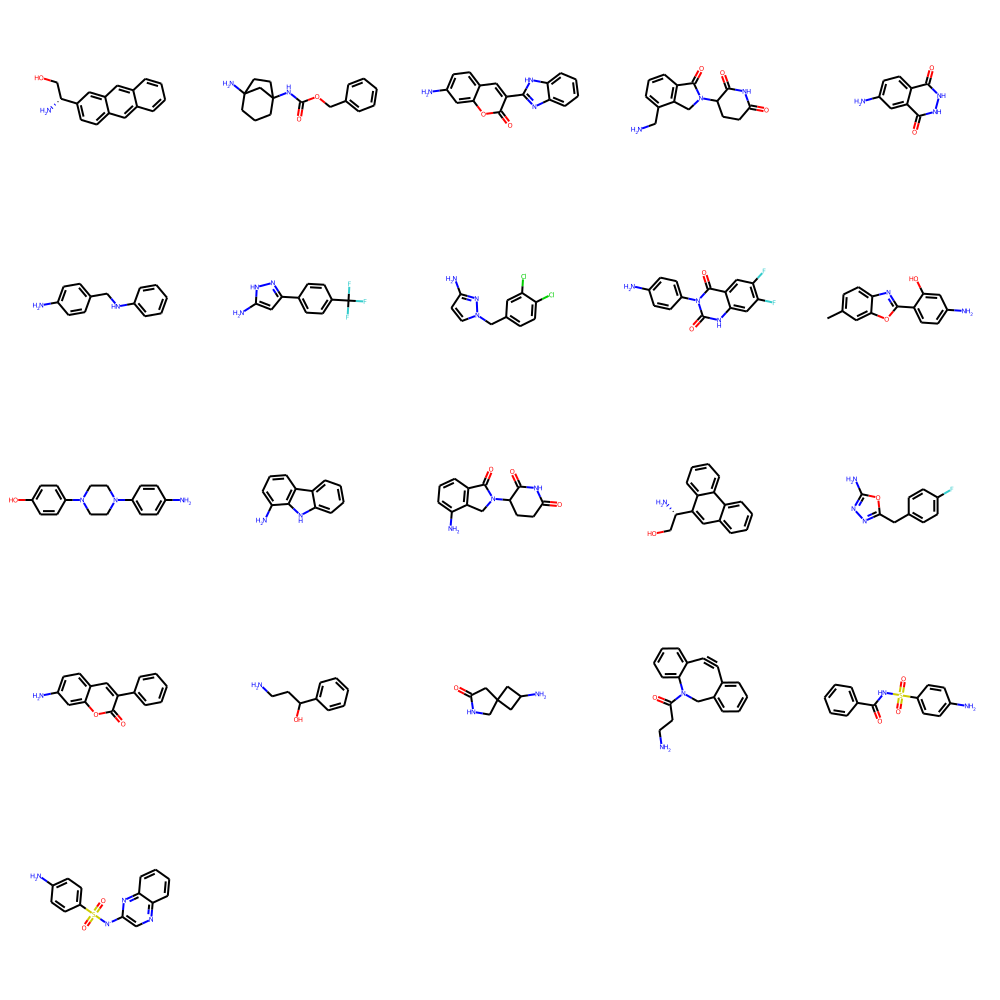

In [18]:
smiles_to_image_grid(docking_sele_N3_list, img_size=(200, 200), mols_per_row=5, kekulize=True)

In [19]:
with open ('/home/test/BiDe/BiDe_NH2.csv','r') as f:
    lines = f.readlines()
    amine_smiles = [l.split(',') for l in lines]


In [20]:
a = []
cas_list = []
for i in range(len(amine_smiles)):
    ligand_smiles = amine_smiles[i][-10].split('.')
    for j in range(len(ligand_smiles)):
        if ligand_smiles[j] in docking_sele_N3_list:
            if ligand_smiles[j] not in a:
                a.append(ligand_smiles[j])
                cas_list.append(amine_smiles[i][0])
print(cas_list)

['4108-61-6', '895929-56-3', '1383973-53-2', '3682-14-2', '313645-14-6', '127-71-9', '1255942-06-3', '2172063-36-2', '31911-20-3', '1213581-06-6', '24007-66-7', '936500-99-1', '444289-05-8', '1212946-34-3', '74853-08-0', '191732-72-6', '5053-63-4', '18992-86-4', '967-80-6', '828911-26-8', '130599-34-7']


In [21]:
N3_list_lower_65 = []
for i in range(len(keys_list)):
    for j in receptor_pdb_list:
        if float(docking_results[j][i])<-6.5:
            if N3_list[int(keys_list[i].split('_')[0])] not in N3_list_lower_65:
                N3_list_lower_65.append(N3_list[int(keys_list[i].split('_')[0])])

In [22]:
N3_list_lower_65

['[N-]=[N+]=[N]Cc1ccccc1-c1ccccc1',
 '[N-]=[N+]=[N][C@H]1CCN(Cc2ccccc2)C1',
 '[N-]=[N+]=[N]CC[C@H](O)C(=O)O',
 '[N-]=[N+]=[N]C1(C(=O)O)CCC1',
 '[N-]=[N+]=[N][C@H](Cc1cccc2ccccc12)C(=O)O',
 '[N-]=[N+]=[N]CCCN1CCc2ccccc21',
 '[N-]=[N+]=[N]CCCOc1ccc(F)cc1',
 'COc1ccc(CCC[N]=[N+]=[N-])cc1',
 '[N-]=[N+]=[N]Cc1cncc(Br)c1',
 '[N-]=[N+]=[N]Cc1cccc(O)c1',
 '[N-]=[N+]=[N]CCc1cccc(C(F)(F)F)c1',
 '[N-]=[N+]=[N]Cc1cccc(SC(F)(F)F)c1',
 'CC1(C)CC([N]=[N+]=[N-])CC(C)(C)N1',
 '[N-]=[N+]=[N]CC(CC(=O)O)c1ccccc1',
 'CC(C)(C)OC(=O)N1CCC(C[N]=[N+]=[N-])CC1',
 'Cc1noc(C)c1C[N]=[N+]=[N-]',
 '[N-]=[N+]=[N]CC(O)C(F)(F)F',
 'CC(C)(C[N]=[N+]=[N-])C(N)=O',
 '[N-]=[N+]=[N]C(CC(=O)O)c1ccccc1C(F)(F)F',
 '[N-]=[N+]=[N]C(CC(=O)O)c1ccc(Cl)c(Cl)c1',
 '[N-]=[N+]=[N]C(CC(=O)O)c1ccc(F)c(F)c1',
 '[N-]=[N+]=[N]C(CC(=O)O)c1ccc(O)cc1',
 '[N-]=[N+]=[N]C(CC(=O)O)c1cccc(C(F)(F)F)c1',
 '[N-]=[N+]=[N]C(CC(=O)O)c1cccc2ccccc12',
 'COc1ccc2[nH]cc(CC[N]=[N+]=[N-])c2c1',
 'Cc1cccc(CC(CC(=O)O)[N]=[N+]=[N-])c1',
 'CC(C)(C)OC(=O)N1CCC([N]=[

In [23]:
save_list_to_csv( '/home/test/BiDe/N3_list_lower_65.csv',N3_list_lower_65)